In [1]:
import sympy as sp

# Визначимо змінну та функцію
x = sp.symbols('x')
f = sp.Piecewise((x**2 * (3*sp.pi - 2*x), (0 <= x) & (x <= sp.pi)),
                (x**2 * (3*sp.pi + 2*x), (-sp.pi <= x) & (x <= 0)))

# Обчислимо коефіцієнти a_n та b_n
a_0 = (1/sp.pi) * sp.integrate(f, (x, -sp.pi, sp.pi))

a_n = [(1/sp.pi) * sp.integrate(f * sp.cos(n*x), (x, -sp.pi, sp.pi)) for n in range(1, 8)]
b_n = [(1/sp.pi) * sp.integrate(f * sp.sin(n*x), (x, -sp.pi, sp.pi)) for n in range(1, 8)]

a_0, a_n, b_n


(pi**3,
 [-48/pi, 0, -16/(27*pi), 0, -48/(625*pi), 0, -48/(2401*pi)],
 [0, 0, 0, 0, 0, 0, 0])

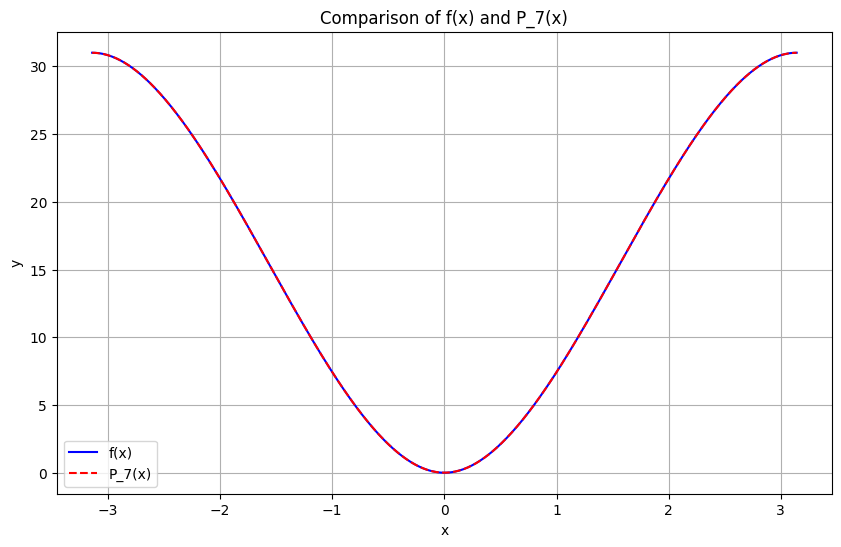

In [3]:
# Побудова тригонометричного полінома P_7(x)
P_7 = a_0 / 2
for n in range(1, 8):
    P_7 += a_n[n-1] * sp.cos(n*x) + b_n[n-1] * sp.sin(n*x)

# Візуалізація функцій
import numpy as np
import matplotlib.pyplot as plt

f_lambda = sp.lambdify(x, f, 'numpy')
P_7_lambda = sp.lambdify(x, P_7, 'numpy')

# Виправимо проблему з конвертацією значення pi
x_vals = np.linspace(-np.pi, np.pi, 500)
f_vals = f_lambda(x_vals)
P_7_vals = P_7_lambda(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_vals, label='f(x)', color='blue')
plt.plot(x_vals, P_7_vals, label='P_7(x)', linestyle='dashed', color='red')
plt.title('Comparison of f(x) and P_7(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
